In [12]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

# Import tools from this project
from Code.descent_methods import *
from Code.utilities import train_test_split, plot_test_results
from Code.activation_functions import sigmoid, relu
from Code.neural_network import neural_network_train, neural_network_model, _beta_init
from Code.logistic_regression import logistic_loss_func, logistic_grad, accuracy_func

# Import tools from the first project 
from Code.project1_tools import feature_matrix_2d, r2_sampling

# Import other libraries
import numpy as np
import jax.nn as nn
from matplotlib import pyplot as plt

In [13]:

n_points = 100
n_epochs = 250


X = np.random.randint(0, 2, size=(n_points, 2))
y = np.expand_dims(np.bitwise_xor(X[:, 0], X[:, 1]), axis=1)


train_X, train_Y, test_X, test_Y, test_index = train_test_split(X, y, 0.2)

layer_list = [train_X.shape[1]] + [2] + [train_Y.shape[1]]

beta0 = _beta_init(layer_list)

model = (lambda beta, X: neural_network_model(beta, X, relu, sigmoid))



loss_func = logistic_loss_func(model)
log_loss_grad = logistic_grad(model)
accuracy_test_func = accuracy_func(model)

num_batches = int(len(train_Y) / 10)

[Array(0.7662465, dtype=float32), Array(0.76372707, dtype=float32), Array(0.7635272, dtype=float32), Array(0.7682948, dtype=float32), Array(0.7761377, dtype=float32), Array(0.77311295, dtype=float32), Array(0.7675335, dtype=float32), Array(0.76309013, dtype=float32), Array(0.75967735, dtype=float32), Array(0.7573962, dtype=float32), Array(0.7532116, dtype=float32), Array(0.74848855, dtype=float32), Array(0.74456614, dtype=float32), Array(0.74134916, dtype=float32), Array(0.73716384, dtype=float32), Array(0.7328582, dtype=float32), Array(0.72782534, dtype=float32), Array(0.7244028, dtype=float32), Array(0.72079873, dtype=float32), Array(0.7174221, dtype=float32), Array(0.7140216, dtype=float32), Array(0.7104972, dtype=float32), Array(0.70785934, dtype=float32), Array(0.7053124, dtype=float32), Array(0.7031007, dtype=float32), Array(0.70171344, dtype=float32), Array(0.7003244, dtype=float32), Array(0.6992221, dtype=float32), Array(0.6985547, dtype=float32), Array(0.6976755, dtype=float32

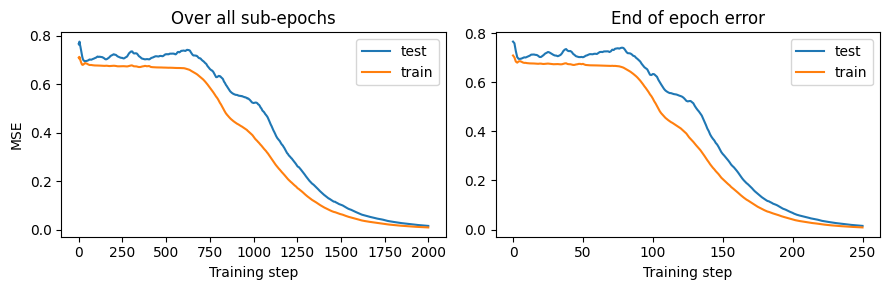

In [14]:
result_adam = SGD_adam(train_X, train_Y, test_X, test_Y, grad_method=log_loss_grad,n_epochs=n_epochs, beta0=beta0, test_loss_func=loss_func)
print(result_adam["test_loss_list"])
plot_test_results(result_adam["test_loss_list"], result_adam["train_loss_list"], num_batches)

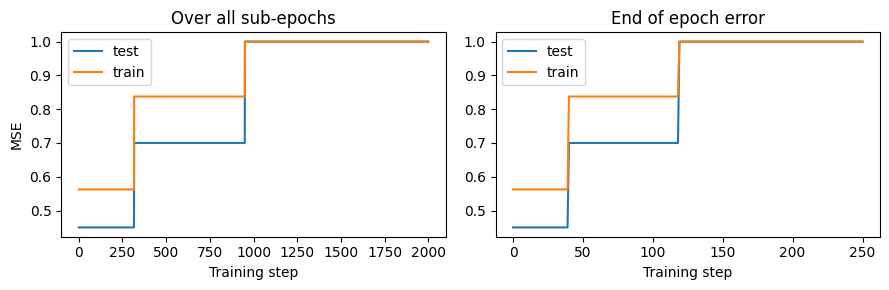

In [15]:
result_adam = SGD_adam(train_X, train_Y, test_X, test_Y, grad_method=log_loss_grad,n_epochs=n_epochs, beta0=beta0, test_loss_func=accuracy_test_func)
plot_test_results(result_adam["test_loss_list"], result_adam["train_loss_list"], num_batches)